In [1]:
import webbrowser
import urllib.request
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

필요 모듈 import하였다. 

# 데이터 추출

In [11]:
data = pd.read_csv('자동차 에너지소비효율등급 인증 현황_190903..csv', encoding = 'CP949')

경차만 추출하였다.

In [12]:
data[data['배기량']<1000]
tiny=data[data['배기량']<1000]

In [13]:
tiny_mpg=tiny[['모델명', '제조사','유종', '복합연비']]

In [14]:
tiny_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 392 to 2086
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     127 non-null    object 
 1   제조사     127 non-null    object 
 2   유종      127 non-null    object 
 3   복합연비    127 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.0+ KB


In [15]:
tiny_mpg.describe()

,복합연비
count,127.000000
mean,10.041732
std,13.891310
min,1.600000
25%,4.050000
50%,5.600000
75%,13.200000
max,96.200000


In [16]:
tiny_mpg[tiny_mpg['복합연비']>10]

,모델명,제조사,유종,복합연비
392,"스토닉 1.0 T-GDI 7DCT (15""타이어)",기아,휘발유,13.7
395,"스토닉 1.0 T-GDI 7DCT (17""타이어)",기아,휘발유,13.5
1933,넥쏘 수소전기차(17인치타이어),현대,수소,96.2
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,91.7
1964,스파크 1.0,한국지엠,휘발유,15.0
1965,스파크 1.0,한국지엠,휘발유,15.0
1966,스파크 밴 1.0,한국지엠,휘발유,15.0
1967,스파크 밴 1.0,한국지엠,휘발유,15.0
1968,"레이 1.0가솔린 (PE, 15인치 타이어)",기아,휘발유,12.7
1969,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)",기아,휘발유,13.0


경차들의 복합 연비는 평균 10.0으로 나타났다. 평균보다 상위에 해당하는 모델들은 다음과 같다.

In [18]:
tiny_mpg.sort_values(by='복합연비',ascending=False).head(60)

,모델명,제조사,유종,복합연비
1933,넥쏘 수소전기차(17인치타이어),현대,수소,96.2
2082,넥쏘 수소전기차(19인치타이어),현대,수소,93.7
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,91.7
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,16.2
2009,모닝 1.0가솔린 밴형 (2015년형),기아,휘발유,16.2
1988,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,16.0
1991,모닝(JA) 1.0가솔린 (15),기아,휘발유,16.0
1995,스파크 1.0 CVT S&S,한국지엠,휘발유,15.4
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,15.4
1992,모닝(JA) 1.0가솔린 (15),기아,휘발유,15.4


In [19]:
tiny_mpg.sort_values(by='복합연비',ascending=False).tail(20)

,모델명,제조사,유종,복합연비
2033,재규어 I-PACE EV400,재규어,전기,3.5
2078,파워프라자 라보 ev PEACE,한국지엠,전기,3.5
2044,Model X 100D,테슬라,전기,3.4
2051,Model X 100D,테슬라,전기,3.4
2042,Model X 75D,테슬라,전기,3.4
2043,Model X 100D,테슬라,전기,3.4
2041,Model X 100D,테슬라,전기,3.4
2045,Model X 75D,테슬라,전기,3.4
2046,Model X 75D,테슬라,전기,3.4
2047,Model X 75D,테슬라,전기,3.4


# 경차 분석

In [2]:
dft=pd.read_csv('경차 수정.csv', encoding='utf-8')
n=len(dft)
n

30

사전에 추출한 대상 자료 호출 및 변수 개수 확인.

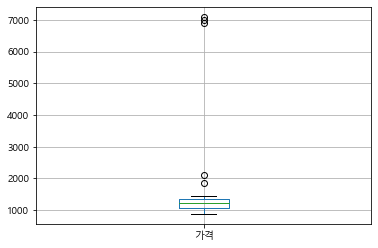

In [3]:
boxplot=dft.boxplot(column=['가격'])
plt.show()

이상치가 유독 높이 나온 것을 확인한 결과, 수소차인 것을 확인하였다. 수소차의 경우, 비록 충전 장소나 가격의 문제가 있으나, 최근 정부와 기업에서 적극적으로 이러한 문제를 해결하는 흐름이 관측되기에 그대로 유지하였다. 나머지 2개의 이상치 역시 단순 가격이 높은 경차 종류인 것에 불과하여 그대로 유지하는 것으로 결정하였다.

이후 해당 데이터 프레임으로 회귀분석을 실시하였다.

In [20]:
x=np.array(dft['복합연비'])
y=np.array(dft['가격'])
p=1

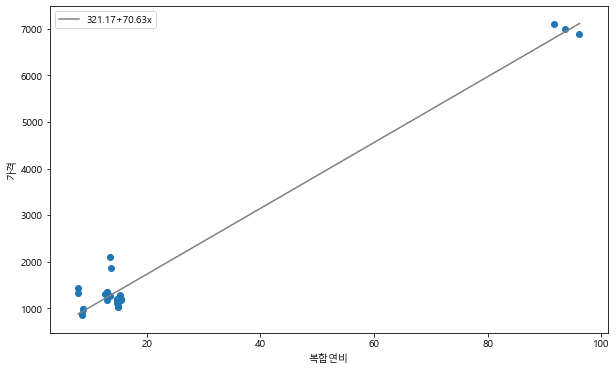

In [21]:
poly_fit=np.polyfit(x, y, 1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(),x.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('복합연비')
ax.set_ylabel('가격')
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [22]:
formula='복합연비~가격'
result=smf.ols(formula,dft).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1001.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           1.85e-23
Time:                        17:19:02   Log-Likelihood:                -84.357
No. Observations:                  30   AIC:                             172.7
Df Residuals:                      28   BIC:                             175.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8513      1.094     -3.519      0.001      -6.093      -1.610
가격             0.0138      0.000     31.634      0.000       0.013       0.015
==============================================================================
Omnibus:                        9.909   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.465
Skew:                          -1.190   Prob(JB):                       0.0145
Kurtosis:                       4.051   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
corr=stats.pear(dft.복합연비, dft.가격)
corr

(0.9862968551767062, 1.8542745817397547e-23)

분석 결과 양의 상관관계가 나오는 것으로 확인 되었다.

# 모델링 생성

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
x=dft['복합연비']
y=dft['가격']

In [35]:
line=LinearRegression()
line.fit(x.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
line.predict([[10]])

array([1027.446])

In [37]:
line.coef_

array([70.628])

In [38]:
line.intercept_

321.16937257078393

생성된 모델식은 다음과 같다.

# y=70.628x+321.16937257078393

# 결과 분석

경차의 경우, 다인승(가족탑승)을 목적으로 두기 보다는 단순 통근용 등의 목적으로 구매하는 경우가 많은데, 이러한 연유로 보다 더 경제성을 주안점으로 한 설계가 되었고, 그리하여 이러한 결과가 나온 것으로 보인다.   

즉, 경차 구매자들이 경제성을 고려하는 만큼, 경차 모델들의 주된 가격 설정 요인도 이러한 경제성을 주요 요소로 두고 상정되었다고 하는 것이다.

In [ ]:
#최종 제출은 이상치 제거한 모델로 했다.